<a href="https://colab.research.google.com/github/seon0415/BDA/blob/main/qkrtjdus_0409_%EA%B3%BC%EC%A0%9C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
wine= pd.read_csv('wine_test.csv')

In [4]:
wine

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


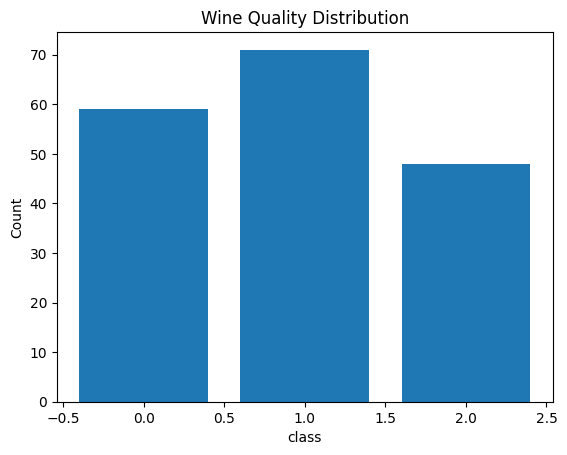

In [5]:
# 클래스 당 몇개의 와인이 있을까

plt.bar(wine['class'].value_counts().index, wine['class'].value_counts().values)

plt.xlabel('class')
plt.ylabel('Count')
plt.title('Wine xLaa Distribution')
plt.show()

Text(0, 0.5, 'color_intensity')

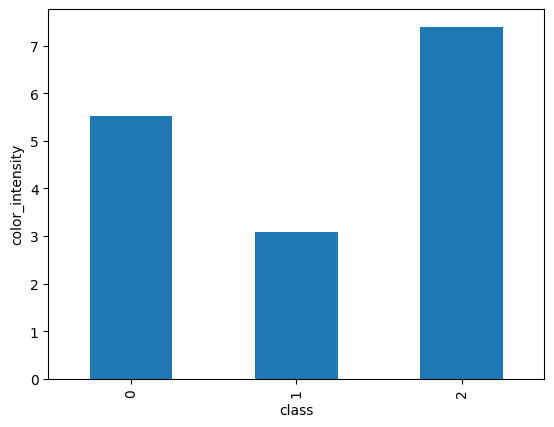

In [11]:
# class별 색상강도 평균
data=wine.groupby("class")['color_intensity'].mean()

data.plot(kind='bar')

plt.xlabel('class')
plt.ylabel('color_intensity')

##class-색상강도

In [91]:
data0=wine.query('`class`==0')['color_intensity']
data1=wine.query('`class`==1')['color_intensity']
data2=wine.query('`class`==2')['color_intensity']

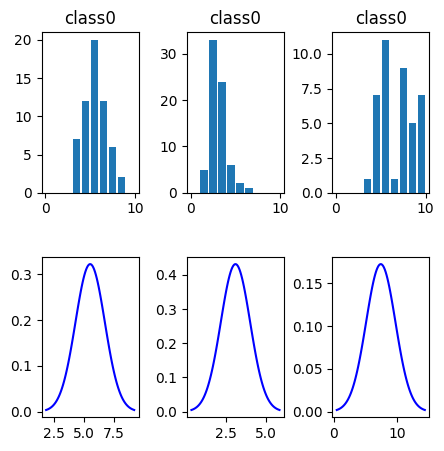

In [90]:
##**class** 별 색상강도 분포

import matplotlib.pyplot as plt

fig, ax=plt.subplots(nrows=2, ncols=3, figsize=(5,5))

#class0
ax[0][0].hist(data0, bins=10, range=(0, 10), rwidth=0.8)
ax[0][0].set_title('class0')

#class1
ax[0][1].hist(data1, bins=10, range=(0, 10), rwidth=0.8)
ax[0][1].set_title('class0')

#class2
ax[0][2].hist(data2, bins=10, range=(0, 10), rwidth=0.8)
ax[0][2].set_title('class0')

#class0 정규분포 시각화
mu=data0.mean()
sigma = data0.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

dist = norm(mu, sigma)
pdf = dist.pdf(x)

ax[1][0].plot(x, pdf, color='blue')

#class1 정규분포 시각화
mu=data1.mean()
sigma = data1.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

dist = norm(mu, sigma)
pdf = dist.pdf(x)

ax[1][1].plot(x, pdf, color='blue')

#class2 정규분포 시각화
mu=data2.mean()
sigma = data2.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

dist = norm(mu, sigma)
pdf = dist.pdf(x)

ax[1][2].plot(x, pdf, color='blue')

plt.subplots_adjust(wspace= 0.5, hspace= 0.4)
plt.show()

####클라스 별 색상강도 t검정

In [77]:
from scipy import stats

In [92]:
stats.ttest_ind(data0, data2, equal_var=True)
# 유의수준 0.05보다 훨씬 작으므로, 귀무가설을 기각하고 대립가설을 채택할 수 있습니다. 

Ttest_indResult(statistic=-5.340583483187493, pvalue=5.402431422199361e-07)

In [93]:
stats.ttest_ind(data0, data1, equal_var=True)
# 유의수준 0.05보다 훨씬 작으므로, 귀무가설을 기각하고 대립가설을 채택할 수 있습니다. 

Ttest_indResult(statistic=12.852536979361243, pvalue=8.582794060323507e-25)

In [94]:
stats.ttest_ind(data1, data2, equal_var=True)
# 유의수준 0.05보다 훨씬 작으므로, 귀무가설을 기각하고 대립가설을 채택할 수 있습니다. 

Ttest_indResult(statistic=-14.148445833386669, pvalue=4.239911922737719e-27)

####클라스별 색상강도 shapiro 검정

In [74]:
##클라스 1 색상강도 shapiro 검정
from scipy.stats import shapiro

stat, p = shapiro(data0)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('클라스0은 정규분포를 따르는 것으로 나타났습니다 (p > alpha)')
else:
    print('클라스0은 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)')

stat=0.968, p=0.125
샘플이 정규분포를 따르는 것으로 나타났습니다 (p > alpha)


In [73]:
##클라스 1 색상강도 shapiro 검정
from scipy.stats import shapiro

stat, p = shapiro(data1)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('클라스1는 정규분포를 따르는 것으로 나타났습니다 (p > alpha)')
else:
    print('클라스1는 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)')

stat=0.932, p=0.001
샘플이 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)


In [76]:
##클라스 2 색상강도 shapiro 검정
from scipy.stats import shapiro

stat, p = shapiro(data2)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('클라스2는 정규분포를 따르는 것으로 나타났습니다 (p > alpha)')
else:
    print('클라스2는 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)')

stat=0.958, p=0.088
샘플이 정규분포를 따르는 것으로 나타났습니다 (p > alpha)


##class-hue

##class-hue

In [98]:
hue0=wine.query('`class`==0')['hue']
hue1=wine.query('`class`==1')['hue']
hue2=wine.query('`class`==2')['hue']

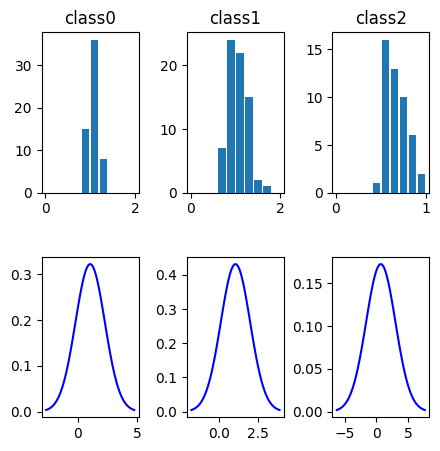

In [99]:
##**class** 별 hue 분포

import matplotlib.pyplot as plt

fig, ax=plt.subplots(nrows=2, ncols=3, figsize=(5,5))

#class0
ax[0][0].hist(hue0, bins=10, range=(0, 2), rwidth=0.8)
ax[0][0].set_title('class0')

#class1
ax[0][1].hist(hue1, bins=10, range=(0, 2), rwidth=0.8)
ax[0][1].set_title('class1')

#class2
ax[0][2].hist(hue2, bins=10, range=(0, 1), rwidth=0.8)
ax[0][2].set_title('class2')

#class0 정규분포 시각화
mu=hue0.mean()
sigma = data0.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

dist = norm(mu, sigma)
pdf = dist.pdf(x)

ax[1][0].plot(x, pdf, color='blue')

#class1 정규분포 시각화
mu=hue1.mean()
sigma = data1.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

dist = norm(mu, sigma)
pdf = dist.pdf(x)

ax[1][1].plot(x, pdf, color='blue')

#class2 정규분포 시각화
mu=hue2.mean()
sigma = data2.std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

dist = norm(mu, sigma)
pdf = dist.pdf(x)

ax[1][2].plot(x, pdf, color='blue')

plt.subplots_adjust(wspace= 0.5, hspace= 0.4)
plt.show()

####클라스 별 색상강도 t검정

In [ ]:
from scipy import stats

In [ ]:
stats.ttest_ind(data0, data2, equal_var=True)
# 유의수준 0.05보다 훨씬 작으므로, 귀무가설을 기각하고 대립가설을 채택할 수 있습니다. 

Ttest_indResult(statistic=-5.340583483187493, pvalue=5.402431422199361e-07)

In [ ]:
stats.ttest_ind(data0, data1, equal_var=True)
# 유의수준 0.05보다 훨씬 작으므로, 귀무가설을 기각하고 대립가설을 채택할 수 있습니다. 

Ttest_indResult(statistic=12.852536979361243, pvalue=8.582794060323507e-25)

In [ ]:
stats.ttest_ind(data1, data2, equal_var=True)
# 유의수준 0.05보다 훨씬 작으므로, 귀무가설을 기각하고 대립가설을 채택할 수 있습니다. 

Ttest_indResult(statistic=-14.148445833386669, pvalue=4.239911922737719e-27)

####클라스별 색상강도 shapiro 검정

In [ ]:
##클라스 1 색상강도 shapiro 검정
from scipy.stats import shapiro

stat, p = shapiro(data0)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('클라스0은 정규분포를 따르는 것으로 나타났습니다 (p > alpha)')
else:
    print('클라스0은 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)')

stat=0.968, p=0.125
샘플이 정규분포를 따르는 것으로 나타났습니다 (p > alpha)


In [ ]:
##클라스 1 색상강도 shapiro 검정
from scipy.stats import shapiro

stat, p = shapiro(data1)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('클라스1는 정규분포를 따르는 것으로 나타났습니다 (p > alpha)')
else:
    print('클라스1는 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)')

stat=0.932, p=0.001
샘플이 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)


In [ ]:
##클라스 2 색상강도 shapiro 검정
from scipy.stats import shapiro

stat, p = shapiro(data2)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('클라스2는 정규분포를 따르는 것으로 나타났습니다 (p > alpha)')
else:
    print('클라스2는 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)')

stat=0.958, p=0.088
샘플이 정규분포를 따르는 것으로 나타났습니다 (p > alpha)


In [ ]:
#클라스 별 hue t검정
from scipy import stats

In [79]:
stats.ttest_ind(data0, data2, equal_var=True)
# 유의수준 0.05보다 훨씬 작으므로, 귀무가설을 기각하고 대립가설을 채택할 수 있습니다. 

Ttest_indResult(statistic=-5.340583483187493, pvalue=5.402431422199361e-07)

In [80]:
stats.ttest_ind(data0, data1, equal_var=True)
# 유의수준 0.05보다 훨씬 작으므로, 귀무가설을 기각하고 대립가설을 채택할 수 있습니다. 

Ttest_indResult(statistic=12.852536979361243, pvalue=8.582794060323507e-25)

In [81]:
stats.ttest_ind(data1, data2, equal_var=True)
# 유의수준 0.05보다 훨씬 작으므로, 귀무가설을 기각하고 대립가설을 채택할 수 있습니다. 

Ttest_indResult(statistic=-14.148445833386669, pvalue=4.239911922737719e-27)

In [82]:
##클라스 0 hue shapiro 검정
from scipy.stats import shapiro

stat, p = shapiro(data0)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('샘플이 정규분포를 따르는 것으로 나타났습니다 (p > alpha)')
else:
    print('샘플이 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)')

stat=0.968, p=0.125
샘플이 정규분포를 따르는 것으로 나타났습니다 (p > alpha)


In [88]:
##클라스 1 hue shapiro 검정
from scipy.stats import shapiro

stat, p = shapiro(data1)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('샘플이 정규분포를 따르는 것으로 나타났습니다 (p > alpha)')
else:
    print('샘플이 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)')

stat=0.977, p=0.225
샘플이 정규분포를 따르는 것으로 나타났습니다 (p > alpha)


In [89]:
##클라스 2 색상강도 hue 검정
from scipy.stats import shapiro

stat, p = shapiro(data2)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('샘플이 정규분포를 따르는 것으로 나타났습니다 (p > alpha)')
else:
    print('샘플이 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)')

stat=0.946, p=0.028
샘플이 정규분포를 따르지 않는 것으로 나타났습니다 (p <= alpha)
